In [341]:
import pandas as pd
from matplotlib import pyplot as plt

In [519]:
df_raw = pd.read_csv('data/df.csv')
df = df_raw

In [520]:
df['price_per_covered_meter'] = df['price'] / df['covered_area']
df['uncovered_area'] = df['total_area'] - df['covered_area']
uncovered_adj_factor = 0.5
df['total_area_adj'] = df['covered_area'] + df['uncovered_area'] * uncovered_adj_factor
df['price_per_meter'] = df['price'] / df['total_area']
df['price_per_meter_adj'] = df['price'] / df['total_area_adj']

from shapely.geometry import Point, Polygon

isla = (-32.934436, -60.612972)
feb27_y_rio = (-32.971455, -60.621508)
feb27_y_francia = (-32.962786, -60.670989)
feb_27_y_avellaneda = (-32.960207, -60.684755)
pellegrini_y_rio = (-32.961039, -60.620171)
pellegrini_y_francia = (-32.952382, -60.668372)
pellegrini_y_avellaneda = (-32.950064, -60.682064)
avellaneda_y_rio = (-32.911361, -60.671997)
francia_y_rio = (-32.924599, -60.661318)

def in_city_center(lat, long):
    point = Point(lat, long)
    polygon = Polygon([avellaneda_y_rio, isla, feb27_y_rio, feb_27_y_avellaneda])
    return polygon.contains(point)

df['in_city_center'] = df.apply(lambda row: in_city_center(row['lat'], row['long']), axis=1)


In [521]:
df.head()

,title,currency,low_price,high_price,price,location,address,area_unit,total_area,covered_area,...,route,street_number,lat,long,price_per_covered_meter,uncovered_area,total_area_adj,price_per_meter,price_per_meter_adj,in_city_center
0,Casa - Fisherton,USD,NaN,NaN,180000.0,"Fisherton, Rosario",Wilde 455 BIS 00-08,NaN,148.0,148.0,...,NaN,NaN,NaN,NaN,1216.216216,0.0,148.0,1216.216216,1216.216216,False
1,Casa en Venta Tres Dorm. Fisherton,USD,NaN,NaN,68000.0,"Fisherton, Rosario",Wilde Bis 1100,NaN,269.0,130.0,...,NaN,NaN,NaN,NaN,523.076923,139.0,199.5,252.788104,340.852130,False
2,Venta Casa de 2 Dorm.. Empalme Graneros.,USD,NaN,NaN,50000.0,"Empalme Graneros, Rosario",Gabriel Carrasco 2375,NaN,90.0,90.0,...,NaN,NaN,NaN,NaN,555.555556,0.0,90.0,555.555556,555.555556,False
3,Conocé los alrededores de la propiedad,USD,NaN,NaN,177235.0,"Distrito Centro, Rosario",Laprida 1300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Casa - Luis Agote,USD,NaN,NaN,103500.0,"Luis Agote, Distrito Centro",Jujuy 3200,NaN,112.0,112.0,...,NaN,NaN,NaN,NaN,924.107143,0.0,112.0,924.107143,924.107143,False


In [522]:
n = df.shape[0]

In [523]:
df['currency'].value_counts()/n

USD    0.978226
ARS    0.021774
Name: currency, dtype: float64

In [524]:
mask = df['currency'] == 'USD'
df = df[mask]
n = df.shape[0]

<AxesSubplot:>

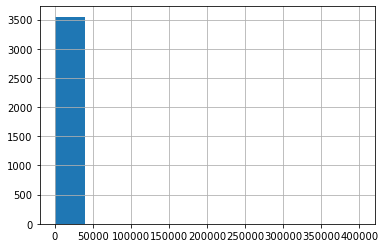

In [525]:
df['price_per_meter'].hist()

<AxesSubplot:>

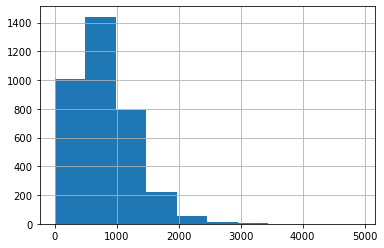

In [526]:
mask = df['price_per_meter'] < 5000
df[mask]['price_per_meter'].hist()

In [527]:
mask = df['price_per_meter'] > 5000
df[mask].shape[0]/n

0.004396812311074471

In [528]:
mask = df['price_per_meter'] < 4000
df = df[mask]
n = df.shape[0]

<AxesSubplot:>

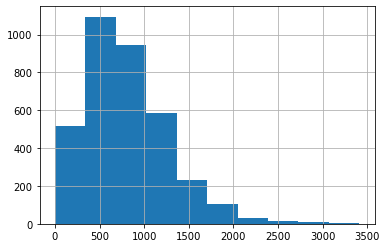

In [529]:
df['price_per_meter'].hist()

In [530]:
mask = df['price_per_meter'] > 3000
df[mask]['url'].iloc[1]

'https://www.zonaprop.com.ar/propiedades/departamento-duplex-2-dorm.-en-venta.-vista-franca-al-49028417.html'

In [531]:
mask = df['price'] > 1
df = df[mask]
n = df.shape[0]

In [532]:
mask = df['price_per_meter'] > 100
df = df[mask]
n = df.shape[0]

In [533]:
mask = df['price_per_meter'] < 200
df[mask]['url'].iloc[1]

'https://www.zonaprop.com.ar/propiedades/casa-de-3-dorm.-en-venta-con-pileta-y-cochera-hostal-47870413.html'

<AxesSubplot:>

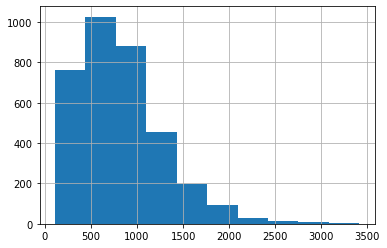

In [534]:
df['price_per_meter'].hist()

In [535]:
df.groupby('location')['price_per_meter'].size().sort_values(ascending=False)

location
Rosario, Santa Fe                                      1205
Fisherton, Rosario                                      488
Distrito Centro, Rosario                                223
Alberdi, Rosario                                        169
Echesortu, Rosario                                      151
Belgrano, Rosario                                       113
Abasto, Rosario                                         112
Arroyito, Rosario                                       107
La Florida, Rosario                                      89
Azcuénaga, Rosario                                       74
Tiro Suizo, Rosario                                      64
Ludueña, Rosario                                         49
Saladillo, Rosario                                       49
España y Hospitales, Rosario                             48
Pichincha, Rosario                                       44
Martin, Rosario                                          42
Bella Vista, Rosario           

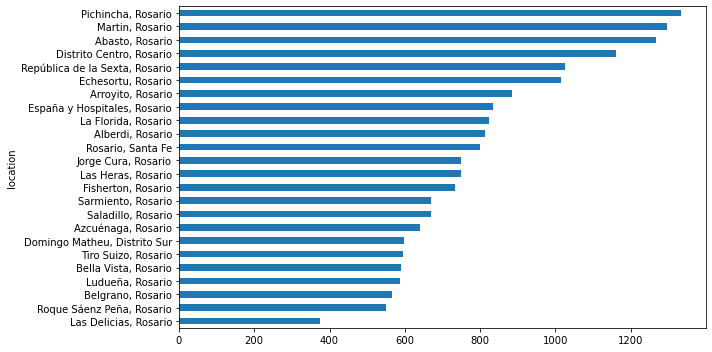

In [536]:
is_big_location = df.groupby('location')['price_per_meter'].size() > 20
big_locations = is_big_location.index[is_big_location.values]
mask = df['location'].isin(big_locations)
df[mask].groupby('location')['price_per_meter'].mean().sort_values().plot.barh(figsize=(10, 5))
plt.tight_layout()
plt.savefig('data/charts/price_per_meter.jpg')

In [537]:
mask = df['location'] == 'Rosario, Santa Fe'
df[mask]['url'].iloc[2]

'https://www.zonaprop.com.ar/propiedades/pje.-r.-wagner-1200-e.-rios-4100-casa-de-cinco-48381728.html'

In [538]:
age_mask = df['age'] < 200
df = df[age_mask]
n = df.shape[0]

In [539]:
# Casa de la abuela
direccion_abu = 'Santiago 440'
terreno_abu = 270
covered_area_abu = 240
uncovered_area_abu = 80
age_abu = 50
total_area_abu = covered_area_abu + uncovered_area_abu
total_area_adj_abu = covered_area_abu + uncovered_area_abu * 0.5
print('Total area abu', total_area_abu)
print('Total area adjusted abu', total_area_adj_abu)

Total area abu 320
Total area adjusted abu 280.0


In [540]:
total_area_mask = (df['total_area'] > total_area_abu - 60) & (df['total_area'] < total_area_abu + 60)
covered_area_mask = (df['covered_area'] > covered_area_abu - 60) & (df['covered_area'] < covered_area_abu + 60)
uncovered_area_mask = (df['uncovered_area'] > uncovered_area_abu - 60) & (df['uncovered_area'] < uncovered_area_abu + 60)
age_mask = (df['age'] > age_abu - 30) & (df['age'] < age_abu + 30)

In [541]:
df_abu = df[total_area_mask & covered_area_mask & age_mask & uncovered_area_mask]

<AxesSubplot:>

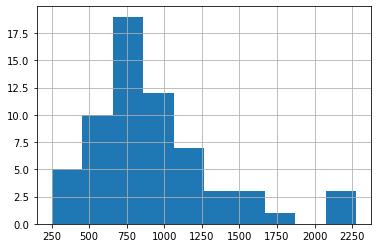

In [542]:
df_abu['price_per_meter_adj'].hist()

In [543]:
columns = [col for col in df.columns if col not in ['currency', 'area_unit', 'file', 'low_price', 'high_price']]
df_abu[columns].to_csv('data/df_abu_no_loc.csv', index=False)

In [544]:
location_mask = df_abu['in_city_center']
df_abu = df_abu[location_mask]

<AxesSubplot:>

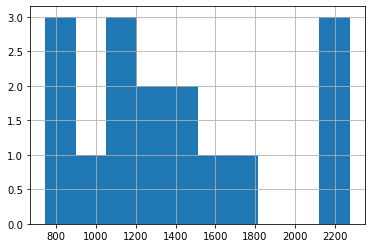

In [545]:
df_abu['price_per_meter_adj'].hist()

In [551]:
print('Price estimate based on covered meter new price', total_area_adj_abu*1600)
print('Price estimate based on average price of meter adjusted', df_abu['price_per_meter_adj'].mean() * total_area_adj_abu)
print('Price estimate based on median price of meter adjusted', df_abu['price_per_meter_adj'].median() * total_area_adj_abu)
df_abu[columns].to_csv('data/df_abu.csv', index=False)

Price estimate based on covered meter new price 448000.0
Price estimate based on average price of meter adjusted 391140.3001166982
Price estimate based on median price of meter adjusted 365237.093380806


In [420]:
# Next steps
# Automate Pandas to spreadsheets